In [1]:
import numpy as np
import pandas as pd
data= pd.read_csv("abalone.csv")

In [16]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
data=data.drop("Sex",axis=1)

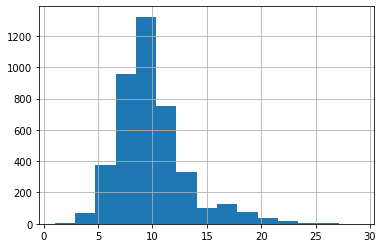

In [24]:
import matplotlib.pyplot as plt
data["Rings"].hist(bins=15)
plt.show()

In [34]:
x=data.drop("Rings",axis=1)
x=x.values
y=data["Rings"]
y=y.values

In [25]:
correalation_matrix = data.corr()
correalation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [26]:
import numpy as np
new_point= np.array([0.4592,0.5718,0.2457,1.254,0.6574,0.8945,0.548])

In [29]:
distances=np.linalg.norm(x-new_point,axis=1)
k=7
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([1934, 2084, 1411, 3518, 1960, 3002, 1519], dtype=int64)

In [30]:
nearest_neighbor_ring = y[nearest_neighbor_ids]
nearest_neighbor_ring

array([ 9, 12, 11, 11, 10, 10, 10], dtype=int64)

In [32]:
prediction =nearest_neighbor_ring.mean()
prediction

10.428571428571429

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=11)

In [41]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(x_train)
mse=mean_squared_error(y_train,train_preds)
rmse=sqrt(mse)
rmse

1.9756971560724101

In [46]:
test_preds=knn_model.predict(x_test)
mse=mean_squared_error(y_train,train_preds)
rmse=sqrt(mse)
rmse

1.9756971560724101

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
X= data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

In [14]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [17]:
new_point= np.array([72,1,479,0,30,0,25548,3.4,140,0,0,9])

In [19]:
distance=np.linalg.norm(X-new_point,axis=1)
k=7
nearest_neighbor_ids = distance.argsort()[:k]
nearest_neighbor_ids

array([277,  15, 281, 230, 167, 200, 163], dtype=int64)

In [20]:
nearest_neighbor_ring = y[nearest_neighbor_ids]
nearest_neighbor_ring

277    0
15     1
281    0
230    1
167    1
200    0
163    1
Name: DEATH_EVENT, dtype: int64

In [21]:
prediction =nearest_neighbor_ring.mean()
prediction

0.5714285714285714

In [8]:
correlation_matrix=data.corr()

In [9]:
correlation_matrix['diabetes']

age                        -0.101012
anaemia                    -0.012729
creatinine_phosphokinase   -0.009639
diabetes                    1.000000
ejection_fraction          -0.004850
high_blood_pressure        -0.012732
platelets                   0.092193
serum_creatinine           -0.046975
serum_sodium               -0.089551
sex                        -0.157730
smoking                    -0.147173
time                        0.033726
DEATH_EVENT                -0.001943
Name: diabetes, dtype: float64

In [10]:
correlation_matrix['DEATH_EVENT']

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

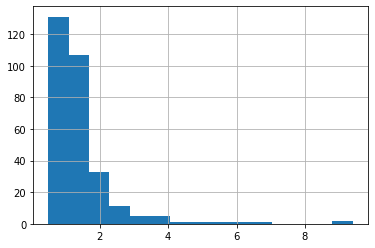

In [20]:
import matplotlib.pyplot as plt
data["serum_creatinine"].hist(bins=15)
plt.show()

In [23]:

from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=11)

In [22]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [28]:
accuracy = []
for i in range (1,30):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    ypred=knn_model.predict(X_test)
    accuracy.append(accuracy_score(y_test,ypred))

In [37]:
c=max(accuracy)

In [41]:
accuracy.index(c)

21

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("diabetes.csv")

In [2]:
x= data.iloc[:,:-1]
y= data.iloc[:,-1:]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [5]:

from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=11)

In [7]:
knn_model.fit(x_train,y_train)

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [11]:
ypred=knn_model.predict(x_test)
accuracy_score(y_test,ypred)

0.7727272727272727